In [19]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 2.3.5 결정 트리
분류와 회귀 문제에 널리 사용하는 모델로 예/ 아니오 질문을 이어 나가면서 학습한다

결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻이며 이런 질문들을 **테스트**라고 한다

모든 리프 노드가 순수 노드가 될 때까지 진행하면 과대적합 되므로 

1. 트리 생성을 일찍 중단하는 전략(사전 가지치기)
2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략(사후 가지치기, 가지치기) 방법을 사용한다

사이킷런에서는 사전 가지치기만 지원한다

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) # 연속된 질문을 최대 4개로 제한
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

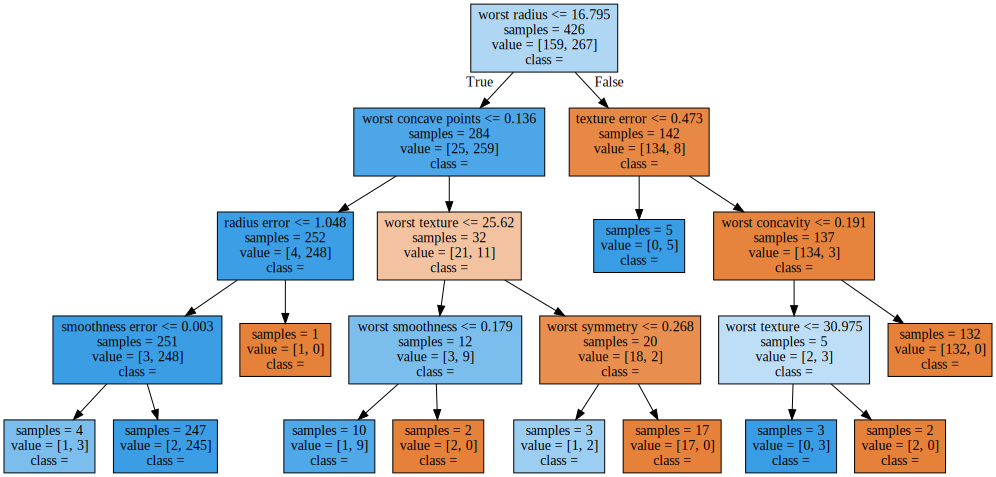

In [23]:
import graphviz
with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    

특성 중요도 : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가

- 0은 전혀 사용되지 않았다는 뜻
- 1은 완벽하게 타깃 클래스를 예측했다는 뜻

In [24]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Feature importances: [0. 1.]


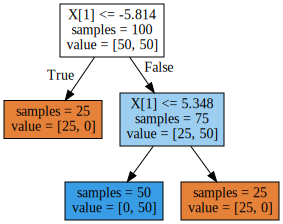

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49828 missing from curre

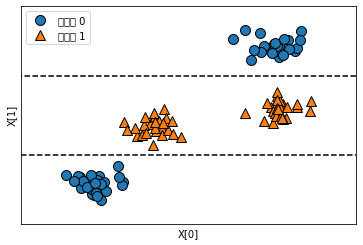

In [25]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

결정 트리를 가지로 분류에 대해서만 논했지만 **회귀 결정 트리**에서도 비슷하게 적용된다

속성 중 **외샵**이란 훈련 데이터 범위 밖의  포인트에 대해 예측을 할 수 없다 

모든 트리 기반 모델의 공통된 단점 : 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다

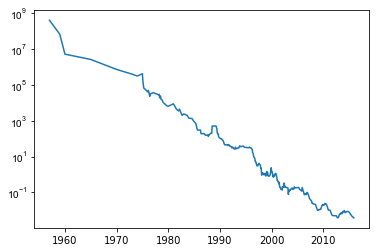

In [36]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join('C:\\Users\\lhg26\\Machine_Learning', "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date<2000]  #훈련 데이터
data_test = ram_prices[ram_prices.date>=2000]  #테스트 데이터

X_train = data_train.date[:,np.newaxis] #날짜 특성만 이용
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]
 
pred_tree =tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree= np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-37-60dc49925764>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis] #날짜 특성만 이용
<ipython-input-37-60dc49925764>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


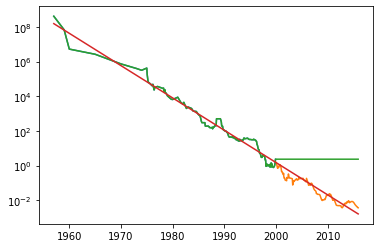

In [38]:
plt.semilogy(data_train.date, data_train.price , label= "훈련 데이터")
plt.semilogy(data_test.date, data_test.price , label= "테스트 데이터")
plt.semilogy(ram_prices.date, price_tree , label= "트리 예측")
plt.semilogy(ram_prices.date, price_lr , label= "선형회귀 예측")

## 장단점과 매개변수
**장점**
1. 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽다
2. 데이터의 스케일에 구애받지 않는다

**단점**
사전 치기를 사용해도 과대적합되는 경향이 있어 일반화 성능이 좋지 않다
-> 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용

# 2.3.6 결정 트리의 앙상블
**앙상블** : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

**랜덤 포레스트**와 **그레이디언트 부스팅** 결정트리가 분류와 회귀 문제의 다양한 데이터셋에서 효과적이라고 입증

## 랜덤 포레스트
결정 트리의 주요 단점인 훈련 데이터에 과대적합되는 문제를 회피할 수 있는 방법

잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다 -> 결정 트리를 많이 만들어야 하며 각각의 트리는 다시 예측을 잘 해야하고 다른 트리와는 구별되어야 한다.

**트리를 랜덤하게 만드는 방법**
1. 데이터 포인트를 무작위로 선택
2. 특성을 무작위로 선택

## 랜덤 포레스트 구축
1. 생성할 트리의 개수를 정해야 한다.(독립적으로 만들어져야하므로 무작위한 선택을 한다)
2. 데이터의 **부트스트랩 샘플**을 생성한다 (n개 데이터 포인트 중에서 무작위로 n번 만큼 데이터를 반복 추출한다 -> 한 샘플이 여러번 중복 추출 가능)
3. 이렇게 만든 데이터 셋으로 결정 트리를 만든다 (후보 특성을 무작위 선택 후 후보들 중에서 최선의 테스트를 찾는다)

몇개의 특성을 고를지 max_features 매개변수를 이용
- 크게 하면 트리들은 매우 비슷해 지며 두드러진 특성을 이용해 데이터에 잘 맞춰진다
- 낮추면 트리들은 많이 달라지고 데이터에 맞추기 위해 깊이가 깊어진다

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다

회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘

텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않으며 이러한 경우 선형 모델이 더 적합하다

n_estimators는 클 수록 좋다 ->더 많은 트리를 평균하면 과대적합을 줄여 안정적인 모델을 만들기 때문

max_features는 각 트리가 얼마나 무작위가 될지 결정하며 작으면 과대적합을 줄여준다 -> 일반적으로 기본 값 쓰는 것이 좋은 방법

## 그레이디언트 부스팅 회귀 트리
여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법 -> 이름은 회귀이지만 회귀와 분류에 모두 사용 가능

이전 오차를 보완하는 방식으로 순차적으로 트리를 만든다

무작위성이 없는 대신 강력한 사전 가지치기가 사용

근본 아이디어는 얕은 트리 같은 간단한 모델(**약한 학습기**)을 많이 연결하는 것

learning_rate 매개변수를 이용해 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

### 장단점과 매개변수
단점
- 매개변수를 잘 조정해야 한다
- 훈련 시간이 길다

중요 매개변수
- n_estimators : 트리의 개수 지정
- learning_rate : 이진 트리의 오차를 보정하는 정도
- max_depth : 각 트리의 복잡도를 낮춘다